<H3>PRI 2022: second
    project delivery</H3>

**GROUP 1**
- Robin Helbig, ist1105007
- Karolina Kowalczyk, ist1105122
- Hubert Budny, ist1105348

<H2>Main facilities</H2>

<h3>Part I: clustering</h3>

*Load documents*

In [1]:
from helper.documentHelper import read_files, intToCategory
from mainFunctions.clustering.clustering import clustering
from mainFunctions.clustering.evaluate import evaluate
from mainFunctions.clustering.interpret import interpret
from mainFunctions.clustering.evaluate import plot_dendrogram
from mainFunctions.clustering.evaluate import pca_plot
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from matplotlib import pyplot as plt

from mainFunctions.relevance.extraction import check_accuracy_documents_bayes_idf_position, \
    check_accuracy_documents_bayes_no_idf_cosine, check_accuracy_documents_bayes_idf_cosine, \
    check_accuracy_documents_bayes_no_idf_position, feature_extraction_tf_idf, map_vectors_to_data_frame, naive_bayes, \
    knn_model, check_accuracy_documents_bayes_no_idf, check_accuracy_documents_knn_idf, \
    check_accuracy_documents_bayes_idf, check_accuracy_documents_knn_no_idf

text_processing = True
documents = read_files(text_processing)

args = {'n_clusters': 7, 'max_df': 0.07, 'criteria': 'mean'}

*A) Clustering*

In [2]:
#code here
cluster_model = clustering(documents, args)
cluster_data = cluster_model.labels_

*B) Visualization*



Most important terms per cluster:
Cluster: 0
Term: cup, TFIDF: 0.024843370568730868
Term: ireland, TFIDF: 0.021996376754095683
Term: injury, TFIDF: 0.021853475273852035
Term: chelsea, TFIDF: 0.02130964502798793
Term: coach, TFIDF: 0.020548218196155037
Term: wales, TFIDF: 0.020487845308978906
Term: rugby, TFIDF: 0.01979554908185964
Term: champion, TFIDF: 0.01783531029765604
Term: league, TFIDF: 0.01664368768639274
Term: victory, TFIDF: 0.016385260232708348


Cluster: 1
Term: brown, TFIDF: 0.0180175405878584
Term: tax, TFIDF: 0.017297171846076164
Term: bank, TFIDF: 0.014602262518819985
Term: howard, TFIDF: 0.01341672388783846
Term: oil, TFIDF: 0.01273120372005187
Term: chancellor, TFIDF: 0.01238824366611565
Term: china, TFIDF: 0.012170365791593387
Term: eu, TFIDF: 0.01163123095795906
Term: tory, TFIDF: 0.011213175274127359
Term: spending, TFIDF: 0.011212009015555276


Cluster: 2
Term: awards, TFIDF: 0.03234598177312598
Term: award, TFIDF: 0.028580635351257034
Term: band, TFIDF: 0.02532

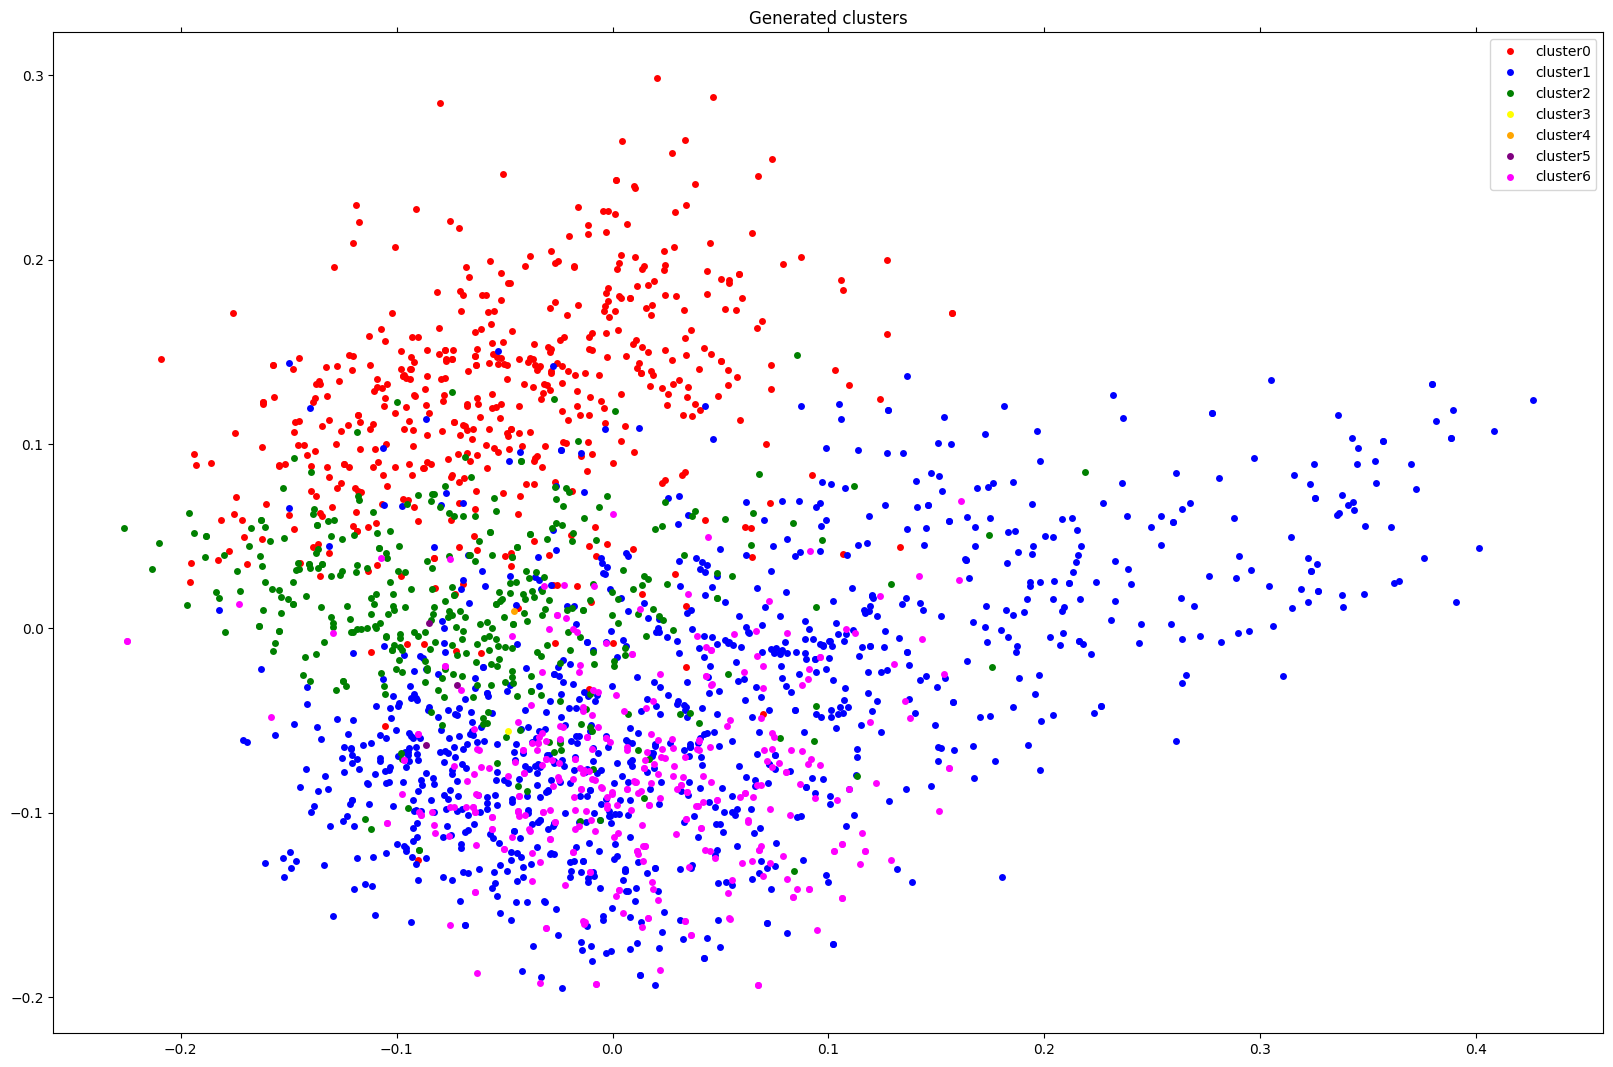

In [3]:
#code and charts here
print("\n\nMost important terms per cluster:")
relevant_term_list = interpret(cluster_data, documents, args)
for index, cluster_relevant_terms in enumerate(relevant_term_list, start=0):
    print("Cluster: " + str(index))
    for i in range(10):
        term = cluster_relevant_terms[i][0]
        tfidf = cluster_relevant_terms[i][1]
        print("Term: " + term + ", TFIDF: " + str(tfidf))
    print("\n")

pca_plot(cluster_data, documents)

*C) Evaluation*



Evaluation:
Silhouette score: 0.014244019766509094
Ran score:  0.5840523733343097
Purity score: 0.736629213483146

Dendrogram: 


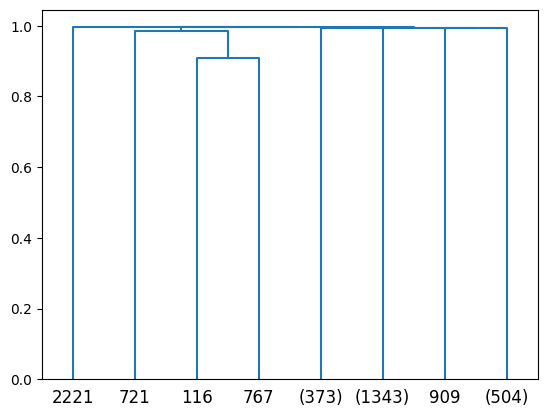

In [4]:
#code, statistics and/or charts here
sil_score, ran_score, pur_score = evaluate(cluster_data, documents)

print("\n\nEvaluation:")
print("Silhouette score: " + str(sil_score))
print("Ran score: ", str(ran_score))
print("Purity score: " + str(pur_score))

print("\nDendrogram: ")
plot_dendrogram(cluster_model, truncate_mode='level', p=3)

<h3>Part II: classification</h3>

*A) Feature extraction*

In [5]:
#code and statistics here
vectors = feature_extraction_tf_idf(documents[0], True)
vectors_no_idf = feature_extraction_tf_idf(documents[0], False)
print(vectors[0].to_string() + "\n" + vectors[1].to_string() + "\n" + vectors[2].to_string())
print(vectors_no_idf[0].to_string() + "\n" + vectors_no_idf[1].to_string()+ "\n" + vectors_no_idf[2].to_string())

Position: 1 Similarity: [[0.66263768]] In summary: True
Position: 2 Similarity: [[0.60578779]] In summary: False
Position: 3 Similarity: [[0.33898756]] In summary: True
Position: 1 Similarity: [[0.66263768]] In summary: True
Position: 2 Similarity: [[0.60578779]] In summary: False
Position: 3 Similarity: [[0.33898756]] In summary: True


*B) Classification*

In [6]:
#code here
(data_bayes_idf, output_bayes_idf) = map_vectors_to_data_frame(vectors)
(data_bayes_no_idf, output_bayes_no_idf) = map_vectors_to_data_frame(vectors_no_idf)
(data_knn_idf, output_knn_idf) = map_vectors_to_data_frame(vectors)
(data_knn_no_idf, output_knn_no_idf) = map_vectors_to_data_frame(vectors_no_idf)

*C) Ranking extension*

In [7]:
#code here
bayes_idf_model, X_train1, X_test1, y_train1, y_test1 = naive_bayes(data_bayes_idf, output_bayes_idf)
bayes_no_idf_model, X_train2, X_test2, y_train2, y_test2 = naive_bayes(data_bayes_no_idf, output_bayes_no_idf)
knn_received_model, X_train3, X_test3, y_train3, y_test3 = knn_model(data_knn_no_idf, output_knn_no_idf)
knn_idf_model, X_train4, X_test4, y_train4, y_test4 = knn_model(data_knn_idf, output_knn_idf)

*D) Evaluation*

In [8]:
#code, statistics and/or charts here
check_accuracy_documents_bayes_no_idf(documents)
check_accuracy_documents_bayes_idf(documents)
check_accuracy_documents_knn_idf(documents)
check_accuracy_documents_knn_no_idf(documents)

Bayes no idf average: 0.5195273674716885
Bayes idf average: 0.5220599504522421
Knn idf average: 0.5354574787517347
Knn no idf average: 0.532049807893592


<h3>Part III: link analysis</h3>

*A) Graph construction*

In [9]:
#code, statistics and/or charts here

*B) Undirected page rank*

In [10]:
#code

*C) Evaluation*

In [11]:
#code, statistics and/or charts here

<H2>Question materials (optional)</H2>

<H3>Part I: clustering</H3>

**(a)** What is the (hypothesized) number of document clusters? Are the clusters cohesive? And well
separated?

In [12]:
# #code, statistics and/or charts here
# sil_scores = []
# ran_scores = []
# pur_scores = []
# for num_clusters in range(3,11):
#     args = {'n_clusters': num_clusters, 'max_df': 0.07, 'criteria': 'mean'}
#     cluster_model = clustering(documents, args)
#     cluster_data = cluster_model.labels_
#
#     #code and charts here
#     print("\n\nMost important terms per cluster:")
#     relevant_term_list = interpret(cluster_data, documents, args)
#     for index, cluster_relevant_terms in enumerate(relevant_term_list, start=0):
#         print("Cluster: " + str(index))
#         for i in range(10):
#             term = cluster_relevant_terms[i][0]
#             tfidf = cluster_relevant_terms[i][1]
#             print("Term: " + term + ", TFIDF: " + str(tfidf))
#         print("\n")
#
#     sil_score, ran_score, pur_score = evaluate(cluster_data, documents)
#     sil_scores.append(sil_score)
#     ran_scores.append(ran_score)
#     pur_scores.append(pur_score)
#
#     print("\n\nEvaluation:")
#     print("Silhouette score: " + str(sil_score))
#     print("Ran score: ", str(ran_score))
#     print("Purity score: " + str(pur_score))
#
#     pca_plot(cluster_data, documents)

In [13]:
# N = 8
#
# ind = np.arange(N)  # the x locations for the groups
# width = 0.12       # the width of the bars
#
# fig, ax = plt.subplots()
# rects1 = ax.bar(ind - width, sil_scores, width, color='#ff7f0e')
# rects2 = ax.bar(ind, ran_scores, width, color='#1f77b4')
# rects3 = ax.bar(ind + width, pur_scores, width, color='#2ca02c')
#
# # add some text for labels, title and axes ticks
# ax.set_ylabel('Scores')
# ax.set_xlabel('Number of clusters')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(('3', '4', '5', '6', '7', '8', '9', '10'))
#
# ax.legend((rects1[0], rects2[0], rects3[0]), ('Silhouette', 'Ran score', 'Purity'))
#
# plt.show()

**(b)** What the clustering reveals regarding the conceptual organization of documents?

In [14]:
#code, statistics and/or charts here

**...** (additional questions with empirical results)

<H3>Part II: Supervised approach using reference summaries</H3>

**(c)** Which features appear to be more relevant to the target summarization task?


In [15]:
check_accuracy_documents_bayes_no_idf_cosine(documents)
check_accuracy_documents_bayes_idf_cosine(documents)
check_accuracy_documents_bayes_no_idf_position(documents)
check_accuracy_documents_bayes_idf_position(documents)

Bayes idf average position: 0.4871220018183351
Bayes no idf average cosine: 0.5164856689947301
Bayes no idf average cosine: 0.5218496295624256
Bayes idf average position: 0.47917048386766253


<H3>END</H3>